## COMP5328 - Advanced Machine Learning
## Assignment 1: Non-negative Matrix Factorization
----------------------------------------------------------------------------------------

Students: Zhuoqun (Calvin) Huang(zhua9812), Matthew Dong(mdon9995), Lupita Sahu(lsah8006)

Lecturer: Tongliang Liu.

Tutors: Nicholas James, Songhua Wu, Xuefeng Li, Yu Yao.

## 1. Load Modules

In [190]:
# autoreload for modules
%load_ext autoreload
%autoreload 2

## Import image processing modules
import numpy as np
import pandas as pd # Used for simpler processing of data
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt

from utils import *

## Import Algorithms
from algs import NmfHyperEstimator, NmfL2Estimator, ModifiedNMF, NmfL1Estimator

#Import preprocessing
from preprocessing import SaltNPepper, Gaussian, ImageNormalizer

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 2. Load Extended YaleB Dataset.
+ Extended YaleB dataset contains 2414 images of 38 human subjects under 9 poses and 64 illumination conditions. All images are manually aligned, cropped, and then resized to 168x192 pixels. To further reduce the computation complexity, all images were reduced to 42x48 pixels.

In [4]:
# Load Extended YaleB dataset.
X_yaleb, Y_yaleb = load_data(root='data/CroppedYaleB', reduce=4)
print('Extended YalB dataset: X.shape = {}, Y.shape = {}'.format(X_yaleb.shape, Y_yaleb.shape))

Extended YalB dataset: X.shape = (2016, 2414), Y.shape = (2414,)


In [191]:
# determine save place
try:
    save_to
except:
    save_to = check_create_dir("../run_"+get_current_time()+"/YaleB")
    image_path = save_to/"figures"
    csv_path = save_to/"tables"
    check_create_dir(image_path)
    check_create_dir(csv_path)

## 3. Demonstration of different types of noises and reconstruction of corrupt images using different algorithms

In [9]:
#Load and scale the data (setting min and max to None to disable scaling)
V_hat, Y_hat = load_data(root='data/CroppedYaleB', reduce=4)
scaler = ImageNormalizer(min=None, max=None)

In [10]:
#Add salt and pepper noise
noise = SaltNPepper(p=0.1, r=0.4) 
V_snp = noise.fit_transform(V_hat)
V_snp = scaler.fit_transform(V_snp)

#Add Gaussian noise
noise_g = Gaussian(mean=0, sigma=10) 
V_g = noise_g.fit_transform(V_hat)
V_g = scaler.fit_transform(V_g)

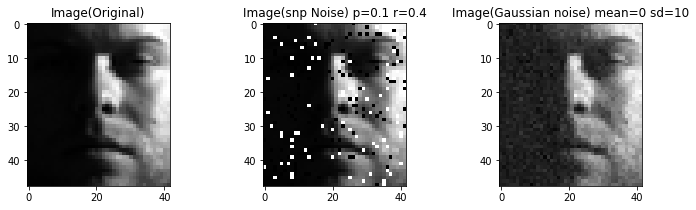

In [11]:
#Plot the results to show noisy images
img_size = [i//4 for i in (168, 192)]
ind = 2 # index of demo image.
plt.figure(figsize=(12,3))
plt.subplot(131)
plt.imshow(V_hat[:,ind].reshape(img_size[1],img_size[0]), cmap=plt.cm.gray)
plt.title('Image(Original)')
plt.subplot(132)
plt.imshow(V_snp[:,ind].reshape(img_size[1],img_size[0]), cmap=plt.cm.gray)
plt.title('Image(snp Noise) p=0.1 r=0.4')
plt.subplot(133)
plt.imshow(V_g[:,ind].reshape(img_size[1],img_size[0]), cmap=plt.cm.gray)
plt.title('Image(Gaussian noise) mean=0 sd=10')
plt.draw()
plt.savefig(image_path/"noisyImage", dpi=100)
plt.show()

In [12]:
###################### Image Reconstruction using NMF algorithms on contaminated images ################

#Using Hypersurface
np.random.seed(0)
nmf_hyper = NmfHyperEstimator(n_components=50) # set n_components to num_classes.
#Salt n Pepper
H = nmf_hyper.fit_transform(V_snp)
W = nmf_hyper.components_
V_snp_reconstructed_hyper = W @ H
#Gaussian
H = nmf_hyper.fit_transform(V_g)
V_g_reconstructed_hyper = W @ H

#Using L2NMF
np.random.seed(0)
nmf_L2 = NmfL2Estimator(n_components=50) # set n_components to num_classes.
#SaltNPepper
H = nmf_L2.fit_transform(V_snp)
W = nmf_L2.components_
V_snp_reconstructed_L2 = W @ H
#Gaussian
H = nmf_L2.fit_transform(V_g)
V_g_reconstructed_L2 = W @ H

#Using L1NMF
np.random.seed(0)
nmf_L1 = NmfL1Estimator(n_components=50) # set n_components to num_classes.
#SaltNPepper
H = nmf_L1.fit_transform(V_snp)
W = nmf_L1.components_
V_snp_reconstructed_L1 = W @ H
#Gaussian
H = nmf_L1.fit_transform(V_g)
V_g_reconstructed_L1 = W @ H

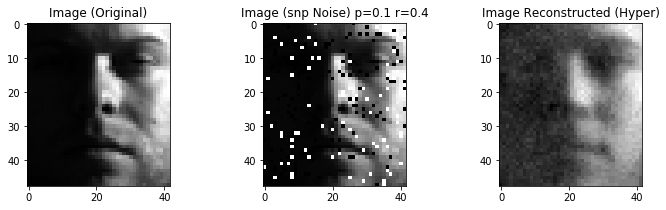

In [13]:
#Reconstructed image (snp noise) using hyper
img_size = [i//4 for i in (168, 192)]
ind = 2 # index of demo image.
plt.figure(figsize=(12,3))
plt.subplot(131)
plt.imshow(V_hat[:,ind].reshape(img_size[1],img_size[0]), cmap=plt.cm.gray)
plt.title('Image (Original)')
plt.subplot(132)
plt.imshow(V_snp[:,ind].reshape(img_size[1],img_size[0]), cmap=plt.cm.gray)
plt.title('Image (snp Noise) p=0.1 r=0.4')
plt.subplot(133)
plt.imshow(V_snp_reconstructed_hyper[:,ind].reshape(img_size[1],img_size[0]), cmap=plt.cm.gray)
plt.title('Image Reconstructed (Hyper)')
plt.savefig(image_path/"reconstructedHyper_snp.png", dpi=100)

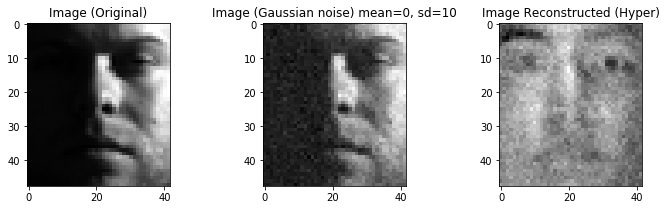

In [14]:
#Reconstructed image (Gaussian noise) using hyper
img_size = [i//4 for i in (168, 192)]
ind = 2 # index of demo image.
plt.figure(figsize=(12,3))
plt.subplot(131)
plt.imshow(V_hat[:,ind].reshape(img_size[1],img_size[0]), cmap=plt.cm.gray)
plt.title('Image (Original)')
plt.subplot(132)
plt.imshow(V_g[:,ind].reshape(img_size[1],img_size[0]), cmap=plt.cm.gray)
plt.title('Image (Gaussian noise) mean=0, sd=10')
plt.subplot(133)
plt.imshow(V_g_reconstructed_hyper[:,ind].reshape(img_size[1],img_size[0]), cmap=plt.cm.gray)
plt.title('Image Reconstructed (Hyper)')
plt.savefig(image_path/"reconstructedHyper_gaussian", dpi=100)

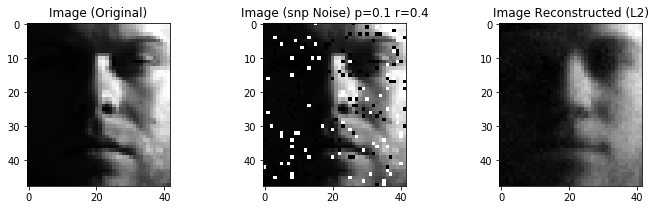

In [15]:
#Reconstructed image (snp noise) using L2NMF
img_size = [i//4 for i in (168, 192)]
ind = 2 # index of demo image.
plt.figure(figsize=(12, 3))
plt.subplot(131)
plt.imshow(V_hat[:,ind].reshape(img_size[1],img_size[0]), cmap=plt.cm.gray)
plt.title('Image (Original)')
plt.subplot(132)
plt.imshow(V_snp[:,ind].reshape(img_size[1],img_size[0]), cmap=plt.cm.gray)
plt.title('Image (snp Noise) p=0.1 r=0.4')
plt.subplot(133)
plt.imshow(V_snp_reconstructed_L2[:,ind].reshape(img_size[1],img_size[0]), cmap=plt.cm.gray)
plt.title('Image Reconstructed (L2)')
plt.savefig(image_path/"reconstructedL2_snp", dpi=100)

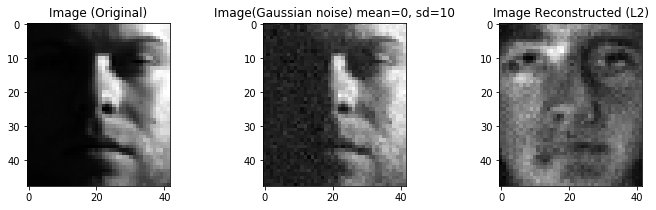

In [16]:
#Reconstructed image (Gaussian noise) using L2NMF
img_size = [i//4 for i in (168, 192)]
ind = 2 # index of demo image.
plt.figure(figsize=(12, 3))
plt.subplot(131)
plt.imshow(V_hat[:,ind].reshape(img_size[1],img_size[0]), cmap=plt.cm.gray)
plt.title('Image (Original)')
plt.subplot(132)
plt.imshow(V_g[:,ind].reshape(img_size[1],img_size[0]), cmap=plt.cm.gray)
plt.title('Image(Gaussian noise) mean=0, sd=10')
plt.subplot(133)
plt.imshow(V_g_reconstructed_L2[:,ind].reshape(img_size[1],img_size[0]), cmap=plt.cm.gray)
plt.title('Image Reconstructed (L2)')
plt.savefig(image_path/"reconstructedL2_gaussian", dpi=100)

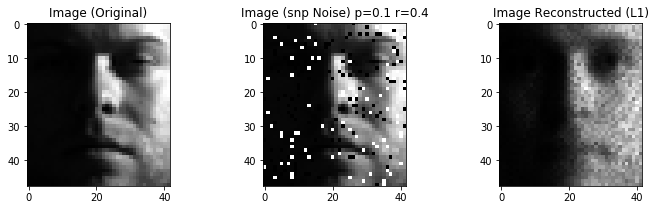

In [17]:
#Reconstructed image (snp noise) using L1NMF
img_size = [i//4 for i in (168, 192)]
ind = 2 # index of demo image.
plt.figure(figsize=(12, 3))
plt.subplot(131)
plt.imshow(V_hat[:,ind].reshape(img_size[1],img_size[0]), cmap=plt.cm.gray)
plt.title('Image (Original)')
plt.subplot(132)
plt.imshow(V_snp[:,ind].reshape(img_size[1],img_size[0]), cmap=plt.cm.gray)
plt.title('Image (snp Noise) p=0.1 r=0.4')
plt.subplot(133)
plt.imshow(V_snp_reconstructed_L1[:,ind].reshape(img_size[1],img_size[0]), cmap=plt.cm.gray)
plt.title('Image Reconstructed (L1)')
plt.savefig(image_path/"reconstructedL1_snp", dpi=100)

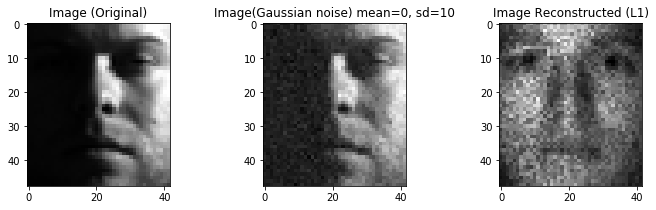

In [18]:
#Reconstructed image (Gaussian noise) using L1NMF
img_size = [i//4 for i in (168, 192)]
ind = 2 # index of demo image.
plt.figure(figsize=(12, 3))
plt.subplot(131)
plt.imshow(V_hat[:,ind].reshape(img_size[1],img_size[0]), cmap=plt.cm.gray)
plt.title('Image (Original)')
plt.subplot(132)
plt.imshow(V_g[:,ind].reshape(img_size[1],img_size[0]), cmap=plt.cm.gray)
plt.title('Image(Gaussian noise) mean=0, sd=10')
plt.subplot(133)
plt.imshow(V_g_reconstructed_L1[:,ind].reshape(img_size[1],img_size[0]), cmap=plt.cm.gray)
plt.title('Image Reconstructed (L1)')
plt.savefig(image_path/"reconstructedL1_gaussian", dpi=100)

## 4. Performance comparisons using metrics (RRE, Accuracy and NMI)
### [(with scaling) using 90% samples (repeat 10 times)]

### 4.1 Using Salt & Pepper noise

In [53]:
#Data loading and scaling
X, Y, scaler = X_yaleb, Y_yaleb, ImageNormalizer(min=None,max=None)

alg_kwargs_pairs = [
    ModifiedNMF, 
    NmfL2Estimator, 
    NmfHyperEstimator,
    NmfL1Estimator
]

#Setting parameters for evaluation
metrics = [rre_score, acc_score, nmi_score]
metrics_names = ["rre", "acc_score", "nmi_score"]
n_trials = 10
pc_sample = 0.9

#Saltnpepper noise
all_n_components = [50]
noise_alg = SaltNPepper
noise_levels = np.arange(0, 0.7, 0.1)
ratios = [0.5] #np.arange(0.0, 1, 0.5)
noise_kwargs_pairs = make_grid_alg_kwargs(noise_alg, p=noise_levels, r=ratios)

#Generating metrics
evaluations_snp = benchmark(X_yaleb, Y_yaleb, scaler,
                        alg_kwargs_pairs, all_n_components,
                        noise_kwargs_pairs,
                        metrics, metrics_names,
                        n_trials, pc_sample
                       )

Noise: {'noise_id': 0, 'p': 0.0, 'r': 0.5}
    Trail: 0
        Alg: ModifiedNMF {}
        Alg: NmfL2Estimator {}
        Alg: NmfHyperEstimator {}
        Alg: NmfL1Estimator {}
    Trail: 1
        Alg: ModifiedNMF {}
        Alg: NmfL2Estimator {}
        Alg: NmfHyperEstimator {}
        Alg: NmfL1Estimator {}
    Trail: 2
        Alg: ModifiedNMF {}
        Alg: NmfL2Estimator {}
        Alg: NmfHyperEstimator {}
        Alg: NmfL1Estimator {}
    Trail: 3
        Alg: ModifiedNMF {}
        Alg: NmfL2Estimator {}
        Alg: NmfHyperEstimator {}
        Alg: NmfL1Estimator {}
    Trail: 4
        Alg: ModifiedNMF {}
        Alg: NmfL2Estimator {}
        Alg: NmfHyperEstimator {}
        Alg: NmfL1Estimator {}
    Trail: 5
        Alg: ModifiedNMF {}
        Alg: NmfL2Estimator {}
        Alg: NmfHyperEstimator {}
        Alg: NmfL1Estimator {}
    Trail: 6
        Alg: ModifiedNMF {}
        Alg: NmfL2Estimator {}
        Alg: NmfHyperEstimator {}
        Alg: NmfL1Estimator {

In [54]:
#Saving metrics data, grouping them and taking mean/std across 10 different samples
evaluations_snp.to_csv(csv_path/'raw_snp_scaled_90%.csv')
evaluations_snp_mean = evaluations_snp.groupby(['alg','n_components','noise_id']).mean()
evaluations_snp_mean = evaluations_snp_mean.rename(columns={'rre':'rre_mean','acc_score':'acc_mean','nmi_score':'nmi_mean'})
evaluations_snp_std = evaluations_snp.groupby(['alg','n_components','noise_id']).std()
evaluations_snp_std = evaluations_snp_std.rename(columns={'rre':'rre_sd','acc_score':'acc_sd','nmi_score':'nmi_sd'})
evaluations_snp_std = evaluations_snp_std.drop(columns=['p', 'r'])
evaluations_snp_grouped = pd.concat([evaluations_snp_mean, evaluations_snp_std],axis=1)
evaluations_snp_grouped.to_csv(csv_path/'Performance_snp_scaled_90%.csv')
evaluations_snp_grouped_idxreset = evaluations_snp_grouped.reset_index()

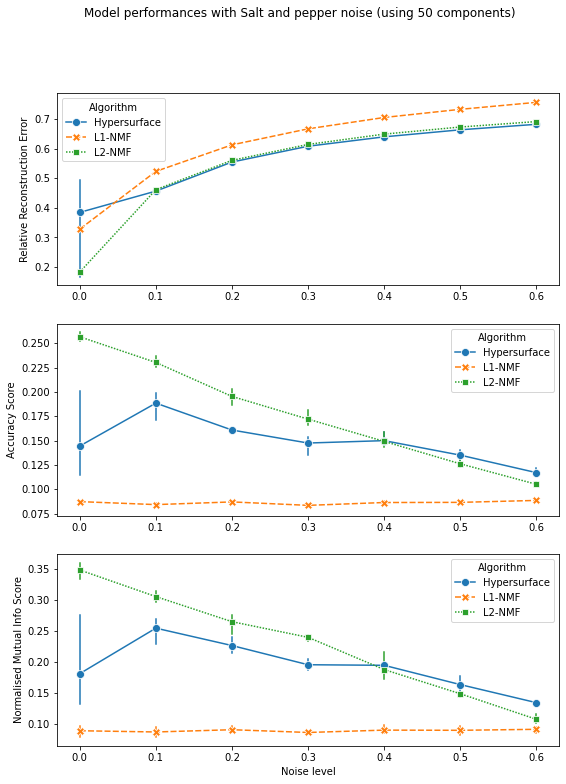

In [249]:
# Plotting RRE, Accuracy and NMI scores against different Salt & pepper noise levels for n_components=50
evaluations_snp = evaluations_snp.sort_values('alg', axis=0)

fig = plt.figure(figsize=[9, 12])

ax = fig.add_subplot(311)
sns.lineplot(
    x="p",
    y="rre",
    hue="alg",
    style="alg",
    data=evaluations_snp.query("alg=='NmfHyperEstimator' or alg=='NmfL1Estimator' or alg=='NmfL2Estimator'"),
    estimator='mean',
    ci=95,
    n_boot=1000,
    markers=True,
    markersize=8,
    seed=None,
    sort=True,
    err_style='bars',
)
ax.set_xlabel('')
ax.set_ylabel("Relative Reconstruction Error")
ax.legend(title="Algorithm", loc="upper left", labels=['Hypersurface','L1-NMF','L2-NMF'])

ax = fig.add_subplot(312)
sns.lineplot(
    x="p",
    y="acc_score",
    hue="alg",
    style="alg",
    data=evaluations_snp.query("alg=='NmfHyperEstimator' or alg=='NmfL1Estimator' or alg=='NmfL2Estimator'"),
    estimator='mean',
    ci=95,
    n_boot=1000,
    markers=True,
    markersize=8,
    seed=None,
    sort=True,
    err_style='bars',
)
ax.set_xlabel('')
ax.set_ylabel("Accuracy Score")
ax.legend(title="Algorithm", loc="upper right", labels=['Hypersurface','L1-NMF','L2-NMF'])

ax = fig.add_subplot(313)
sns.lineplot(
    x="p",
    y="nmi_score",
    hue="alg",
    style="alg",
    data=evaluations_snp.query("alg=='NmfHyperEstimator' or alg=='NmfL1Estimator' or alg=='NmfL2Estimator'"),
    estimator='mean',
    ci=95,
    markers=True,
    markersize=8,
    n_boot=1000,
    seed=None,
    sort=True,
    err_style='bars',
)
ax.set_xlabel("Noise level")
ax.set_ylabel("Normalised Mutual Info Score")
ax.legend(title="Algorithm", loc="upper right", labels=['Hypersurface','L1-NMF','L2-NMF'])
plt.suptitle("Model performances with Salt and pepper noise (using 50 components)")
plt.savefig("snp_scaled_90%")

### 4.2 Gaussian noise

In [56]:
# Gaussian noise
noise_alg = Gaussian
means = [0]
sigmas = list(range(0, 50, 5))
noise_kwargs_pairs = make_grid_alg_kwargs(noise_alg, mean=means, sigma=sigmas)

evaluations_g = benchmark(X_yaleb, Y_yaleb, scaler,
                          alg_kwargs_pairs, all_n_components,
                          noise_kwargs_pairs,
                          metrics, metrics_names,
                          n_trials, pc_sample
                         )  

Noise: {'noise_id': 0, 'mean': 0, 'sigma': 0}
    Trail: 0
        Alg: ModifiedNMF {}
        Alg: NmfL2Estimator {}
        Alg: NmfHyperEstimator {}
        Alg: NmfL1Estimator {}
    Trail: 1
        Alg: ModifiedNMF {}
        Alg: NmfL2Estimator {}
        Alg: NmfHyperEstimator {}
        Alg: NmfL1Estimator {}
    Trail: 2
        Alg: ModifiedNMF {}
        Alg: NmfL2Estimator {}
        Alg: NmfHyperEstimator {}
        Alg: NmfL1Estimator {}
    Trail: 3
        Alg: ModifiedNMF {}
        Alg: NmfL2Estimator {}
        Alg: NmfHyperEstimator {}
        Alg: NmfL1Estimator {}
    Trail: 4
        Alg: ModifiedNMF {}
        Alg: NmfL2Estimator {}
        Alg: NmfHyperEstimator {}
        Alg: NmfL1Estimator {}
    Trail: 5
        Alg: ModifiedNMF {}
        Alg: NmfL2Estimator {}
        Alg: NmfHyperEstimator {}
        Alg: NmfL1Estimator {}
    Trail: 6
        Alg: ModifiedNMF {}
        Alg: NmfL2Estimator {}
        Alg: NmfHyperEstimator {}
        Alg: NmfL1Estimato

In [57]:
#Saving metrics data, grouping them and taking mean/std across 10 different samples
evaluations_g.to_csv(csv_path/'raw_g_scaled_90%.csv')
evaluations_g_mean = evaluations_g.groupby(['alg','n_components','noise_id']).mean()
evaluations_g_mean = evaluations_g_mean.rename(columns={'rre':'rre_mean','acc_score':'acc_mean','nmi_score':'nmi_mean'})
evaluations_g_std = evaluations_g.groupby(['alg','n_components','noise_id']).std()
evaluations_g_std = evaluations_g_std.rename(columns={'rre':'rre_sd','acc_score':'acc_sd','nmi_score':'nmi_sd'})
evaluations_g_std = evaluations_g_std.drop(columns=['mean', 'sigma'])
evaluations_g_grouped = pd.concat([evaluations_g_mean, evaluations_g_std],axis=1)
evaluations_g_grouped.to_csv(csv_path/'Performance_g_scaled_90%.csv')
evaluations_g_grouped_idxreset = evaluations_g_grouped.reset_index()

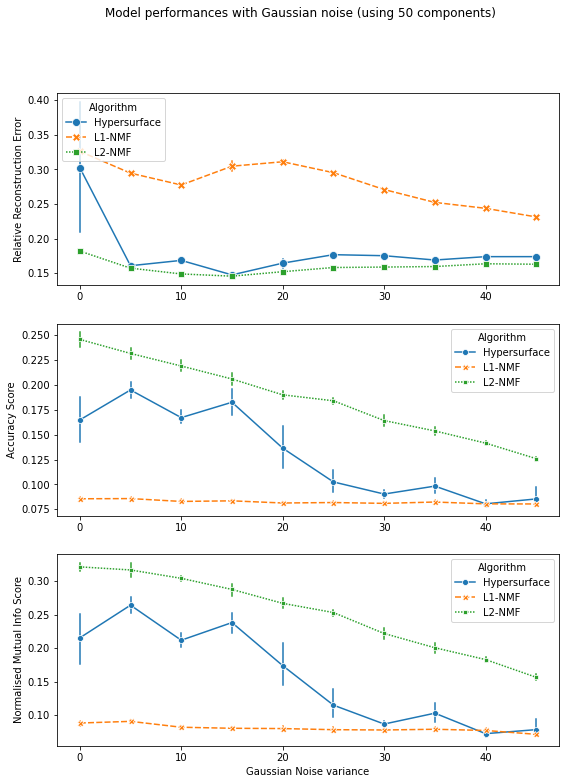

In [248]:
# Plotting RRE, Accuracy and NMI scores against different Gaussian noises for n_components=50
evaluations_g = evaluations_g.sort_values('alg', axis=0)

fig = plt.figure(figsize=[9, 12])

ax = fig.add_subplot(311)
sns.lineplot(
    x="sigma",
    y="rre",
    hue="alg",
    style="alg",
    data=evaluations_g.query("alg=='NmfL2Estimator' or alg=='NmfHyperEstimator' or alg=='NmfL1Estimator'"),
    estimator='mean',
    ci=95,
    n_boot=1000,
    markers=True,
    markersize=8,
    seed=None,
    sort=True,
    err_style='bars',
)
ax.set_xlabel('')
ax.set_ylabel("Relative Reconstruction Error")
ax.legend(title="Algorithm", loc="upper left", labels=['Hypersurface','L1-NMF','L2-NMF'])

ax = fig.add_subplot(312)
sns.lineplot(
    x="sigma",
    y="acc_score",
    hue="alg",
    style="alg",
    data=evaluations_g.query("alg=='NmfL2Estimator' or alg=='NmfHyperEstimator' or alg=='NmfL1Estimator'"),
    estimator='mean',
    ci=95,
    n_boot=1000,
    markers=True,
    seed=None,
    sort=True,
    err_style='bars',
    #legend='full',
)
ax.set_xlabel('')
ax.set_ylabel("Accuracy Score")
ax.legend(title="Algorithm", loc="upper right", labels=['Hypersurface','L1-NMF','L2-NMF'])

ax = fig.add_subplot(313)
sns.lineplot(
    x="sigma",
    y="nmi_score",
    hue="alg",
    style="alg",
    data=evaluations_g.query("alg=='NmfL2Estimator' or alg=='NmfHyperEstimator' or alg=='NmfL1Estimator'"),
    estimator='mean',
    ci=95,
    markers=True,
    n_boot=1000,
    seed=None,
    sort=True,
    err_style='bars',
    #legend='full',
)
ax.set_xlabel("Gaussian Noise variance")
ax.set_ylabel("Normalised Mutual Info Score")
ax.legend(title="Algorithm", loc="upper right", labels=['Hypersurface','L1-NMF','L2-NMF'])
plt.suptitle("Model performances with Gaussian noise (using 50 components)")
plt.savefig("Gaussian_scaled_90%")